In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.cluster import KMeans

data= pd.read_csv('Banknote-authentication-dataset.csv')
data.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [2]:
min_data= np.min(data, 0)
max_data= np.max(data, 0)
normed= (data- min_data)/ (max_data- min_data)
print(normed.head(10))

         V1        V2
0  0.769004  0.839643
1  0.835659  0.820982
2  0.786629  0.416648
3  0.757105  0.871699
4  0.531578  0.348662
5  0.822859  0.877275
6  0.766812  0.628108
7  0.658712  0.260549
8  0.738831  0.730856
9  0.618574  0.858767


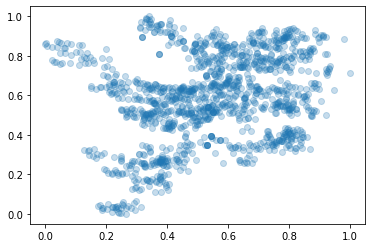

In [3]:
var= normed['V1']
skew= normed['V2']

plt.scatter(var, skew, alpha=0.25)

In [4]:
x_mean= np.mean(var)
y_mean= np.mean(skew)
print(x_mean, y_mean)

0.5391136632764809 0.5873013774145724


In [5]:
mean= np.mean(normed, 1)
print(normed, mean)

            V1        V2
0     0.769004  0.839643
1     0.835659  0.820982
2     0.786629  0.416648
3     0.757105  0.871699
4     0.531578  0.348662
...        ...       ...
1367  0.537124  0.565855
1368  0.407690  0.332868
1369  0.237385  0.011768
1370  0.250842  0.201701
1371  0.324528  0.490747

[1372 rows x 2 columns] 0       0.804323
1       0.828321
2       0.601638
3       0.814402
4       0.440120
          ...   
1367    0.551489
1368    0.370279
1369    0.124577
1370    0.226271
1371    0.407637
Length: 1372, dtype: float64


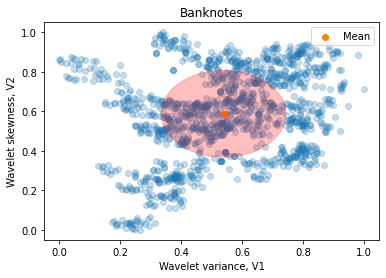

In [6]:
mean= np.mean(normed, 0)
std_dev= np.std(normed, 0)

ellipse= patches.Ellipse([mean[0], mean[1]], std_dev[0]*2, std_dev[1]*2, alpha=0.25, color='red')

fig, graph= plt.subplots()

plt.xlabel('Wavelet variance, V1')
plt.ylabel('Wavelet skewness, V2')

plt.scatter(var, skew, alpha=0.25)
plt.scatter(mean[0], mean[1], label="Mean")
plt.title("Banknotes")
plt.legend()
graph.add_patch(ellipse)
plt.show()

In [7]:
var_skew= np.column_stack((var, skew))

km_res= KMeans(n_clusters=2).fit(var_skew)
centers= km_res.cluster_centers_
print(centers)

[[0.6734041  0.69787255]
 [0.369367   0.44753649]]


In [8]:
clstr_fit= KMeans(n_clusters=2).fit_predict(var_skew)
normed['cluster']= clstr_fit
print(normed.head())
print(clstr_fit)

         V1        V2  cluster
0  0.769004  0.839643        0
1  0.835659  0.820982        0
2  0.786629  0.416648        0
3  0.757105  0.871699        0
4  0.531578  0.348662        1
[0 0 0 ... 1 1 1]


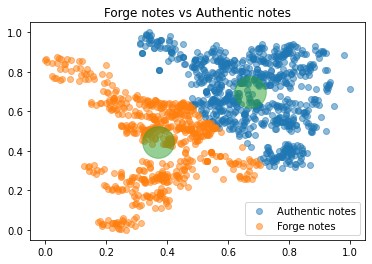

In [13]:
a_notes= normed[normed['cluster']== 0]
f_notes= normed[normed['cluster']== 1]

plt.scatter(a_notes['V1'], a_notes['V2'], alpha=0.5, label="Authentic notes")
plt.scatter(f_notes['V1'], f_notes['V2'], alpha=0.5, label="Forge notes")
plt.scatter(centers[:,0], centers[:,1], s=1000, alpha=0.5)

plt.title("Forge notes vs Authentic notes")
plt.legend()
plt.show()

In [14]:
print(centers)
normed['cluster'].value_counts()

[[0.36918815 0.44724443]
 [0.67314878 0.69777655]]


0    765
1    607
Name: cluster, dtype: int64

In [15]:
#The model detects 765 genuine notes (blue) and 607 forge notes (orange).
#The data points of features of real bank notes are less disperse than the fake ones.
#Rerunning the model a few times to see if it is stable or not. 

var= normed['V1']
skew= normed['V2']

var_skew= np.column_stack((var, skew))

km_res= KMeans(n_clusters=2).fit(var_skew)
centers= km_res.cluster_centers_
print(centers)

clstr_fit= KMeans(n_clusters=2).fit_predict(var_skew)
normed['cluster']= clstr_fit
print(normed.head())
print(clstr_fit)

print(centers)
normed['cluster'].value_counts()

[[0.67364922 0.69798136]
 [0.36955897 0.44781178]]
         V1        V2  cluster
0  0.769004  0.839643        0
1  0.835659  0.820982        0
2  0.786629  0.416648        0
3  0.757105  0.871699        0
4  0.531578  0.348662        1
[0 0 0 ... 1 1 1]
[[0.67364922 0.69798136]
 [0.36955897 0.44781178]]


0    764
1    608
Name: cluster, dtype: int64

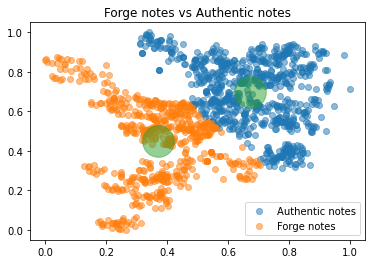

In [16]:
plt.scatter(a_notes['V1'], a_notes['V2'], alpha=0.5, label="Authentic notes")
plt.scatter(f_notes['V1'], f_notes['V2'], alpha=0.5, label="Forge notes")
plt.scatter(centers[:,0], centers[:,1], s=1000, alpha=0.5)

plt.title("Forge notes vs Authentic notes")
plt.legend()
plt.show()

In [17]:
var= normed['V1']
skew= normed['V2']

var_skew= np.column_stack((var, skew))

km_res= KMeans(n_clusters=2).fit(var_skew)
centers= km_res.cluster_centers_
print(centers)

clstr_fit= KMeans(n_clusters=2).fit_predict(var_skew)
normed['cluster']= clstr_fit
print(normed.head())
print(clstr_fit)

print(centers)
normed['cluster'].value_counts()

[[0.67397992 0.69838737]
 [0.3701433  0.44812467]]
         V1        V2  cluster
0  0.769004  0.839643        1
1  0.835659  0.820982        1
2  0.786629  0.416648        1
3  0.757105  0.871699        1
4  0.531578  0.348662        0
[1 1 1 ... 0 0 0]
[[0.67397992 0.69838737]
 [0.3701433  0.44812467]]


1    764
0    608
Name: cluster, dtype: int64

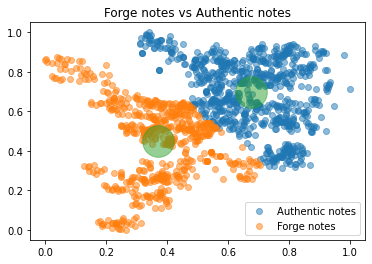

In [18]:
plt.scatter(a_notes['V1'], a_notes['V2'], alpha=0.5, label="Authentic notes")
plt.scatter(f_notes['V1'], f_notes['V2'], alpha=0.5, label="Forge notes")
plt.scatter(centers[:,0], centers[:,1], s=1000, alpha=0.5)

plt.title("Forge notes vs Authentic notes")
plt.legend()
plt.show()

In [19]:
#Since the cluster centers and the number of variables in each cluster are nearly the same in each run, it shows that the model is stable.